# **Project: Anomaly Detection for AITEX Dataset**
#### Track: Preparation
## `Notebook`: Visual and Structural Analyzation of the Patches
**Author**: Oliver Grau 

**Date**: 27.03.2025  
**Version**: 1.0

## Introduction

In this notebook, we perform a **visual and frequency-based analysis of the AITEX dataset patches**, with a focus on understanding the **statistical and structural characteristics of both training and test samples** per fabric type.

Our main objectives are:

- ✅ Identify inconsistencies or gaps in the dataset (e.g., fabric codes present in the test set but missing in the training set)
- ✅ Visually inspect patches across fabric codes to better understand data variability
- ✅ Analyze **frequency distributions (FFT spectra)** to detect structural differences between train and test domains
- ✅ Ensure dataset integrity before training models such as DRÆM

This type of pre-training diagnostic is critical for **detecting hidden domain gaps**, preventing overfitting to certain textures, and avoiding evaluation artifacts caused by incomplete or imbalanced datasets.

---

## Loading the data

In [1]:
from codebase.data.patching import NODefectPatchCreator

creator = NODefectPatchCreator(
    input_folder="./data/NODefect_images",
    output_folder="./artifacts/analyzation/NODefect",
    patch_size=(256, 256),
    prefix="normal",
    exclude_fabric_codes=["00005"]
)

creator.process_and_save_patches()

[Skipped] Excluding fabric code: 00005 (0009_000_05.png)
[Skipped] Excluding fabric code: 00005 (0005_000_05.png)
[Skipped] Excluding fabric code: 00005 (0019_000_05.png)
[Skipped] Excluding fabric code: 00005 (0012_000_05.png)
[Skipped] Excluding fabric code: 00005 (0018_000_05.png)
[Skipped] Excluding fabric code: 00005 (0001_000_05.png)
[Skipped] Excluding fabric code: 00005 (0010_000_05.png)
[Skipped] Excluding fabric code: 00005 (0002_000_05.png)
[Skipped] Excluding fabric code: 00005 (0013_000_05.png)
[Skipped] Excluding fabric code: 00005 (0008_000_05.png)
[Skipped] Excluding fabric code: 00005 (0015_000_05.png)
[Skipped] Excluding fabric code: 00005 (0011_000_05.png)
[Skipped] Excluding fabric code: 00005 (0016_000_05.png)
[Skipped] Excluding fabric code: 00005 (0007_000_05.png)
[Skipped] Excluding fabric code: 00005 (0003_000_05.png)
[Skipped] Excluding fabric code: 00005 (0017_000_05.png)
[Skipped] Excluding fabric code: 00005 (0006_000_05.png)
[Skipped] Excluding fabric code

In [ ]:
from codebase.data.mask_alignment import DefectPatchCreator

creator = DefectPatchCreator(
    defect_folder="./data/Defect_images",
    mask_folder="./data/Mask_images",
    image_output_folder="./artifacts/analyzation/256x256/Defect",
    mask_output_folder="./artifacts/analyzation/256x256/Mask",
    patch_size=(256, 256),
    prefix="defect",
    fabric_codes_intact_image_path="./artifacts/analyzation/256x256/Intact",
    intact_fabric_codes=["00000"]
)
creator.process_and_save_patches()

[!] No corresponding mask found for: ./data/Defect_images/0044_019_04.png
[!] No corresponding mask found for: ./data/Defect_images/0100_025_08.png
[!] No corresponding mask found for: ./data/Defect_images/0097_030_03.png
Saved 1353 patches (defect and intact) to:
  Defect Images: ./artifacts/analyzation/Defect
  Defect Masks:  ./artifacts/analyzation/Mask
  Intact Images for fabrics ['00000']: ./artifacts/analyzation/Intact


In [ ]:
# Watch for changes
%load_ext autoreload
%autoreload 2

from codebase.data.dataset import FabricPatchDataset
from torch.utils.data import DataLoader

batch_size = 128

# Test the train dataset
train_dataset = FabricPatchDataset(
    image_dir="./artifacts/analyzation/256x256/NODefect", #/2311517-195063u",
    mode="train",
    normalize="zero-one",
    augment=False,
    image_size=256,
    use_histogram_equalization=True
    #fabric_code="00004" # 210 images with that code
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Test the test dataset
test_dataset = FabricPatchDataset(
    image_dir="./artifacts/analyzation/256x256/Defect",
    mask_dir="./artifacts/analyzation/256x256/Mask",
    mode="test",
    normalize="zero-one",
    image_size=256,
    use_histogram_equalization=True
    #fabric_code="00004" # there are 73 defect images with that code
)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for i, (x, y_mask, y_label, _, _) in enumerate(test_loader):
    print("Image batch shape:", x.shape)
    print("Mask batch shape:", y_mask.shape)
    print("Patch-level labels:", y_label)
    break  # just one batch for demonstration


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using FFT transform: False
Using histogram equalization: True
Using image size: 256
Using channel repeating: False
Using normalization: zero-one
Using augmentations: False
Using FFT transform: False
Using histogram equalization: True
Using image size: 256
Using channel repeating: False
Using normalization: zero-one
Using augmentations: False
Image batch shape: torch.Size([128, 1, 256, 256])
Mask batch shape: torch.Size([128, 1, 256, 256])
Patch-level labels: tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


## Visualize Data

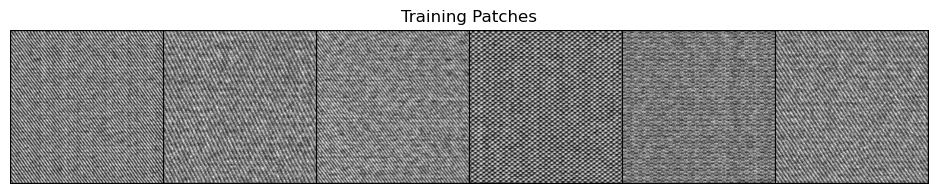

In [16]:
from codebase.data.visualization import show_train_batch

# For train mode
for images in train_loader:
    show_train_batch(images, n=6)
    break


In [6]:
import os
import torchvision.utils as vutils
from pathlib import Path

def save_images_from_loader(train_loader, output_dir="saved_batches", n=6):
    """
    Saves the first 5 batches of images from a DataLoader to disk.
    
    Args:
        train_loader: PyTorch DataLoader
        output_dir (str): Folder to save batches into
        n (int): Number of images to display/save per batch (default: 6)
    """
    os.makedirs(output_dir, exist_ok=True)

    for i, images in enumerate(train_loader):
        if isinstance(images, (tuple, list)):
            images = images[0]  # extract image tensor if it's (images, labels)

        batch = images[:n]  # take the first n images from batch

        # Save as a grid image
        grid = vutils.make_grid(batch, nrow=n, normalize=True, scale_each=True)
        path = Path(output_dir) / f"batch_{i+1:02d}.png"
        vutils.save_image(grid, path)

        print(f"Saved: {path}")

        if i == 4:
            break

save_images_from_loader(train_loader, output_dir="./artifacts/analyzation/debug_batches", n=1)

Saved: artifacts/analyzation/debug_batches/batch_01.png
Saved: artifacts/analyzation/debug_batches/batch_02.png
Saved: artifacts/analyzation/debug_batches/batch_03.png
Saved: artifacts/analyzation/debug_batches/batch_04.png
Saved: artifacts/analyzation/debug_batches/batch_05.png


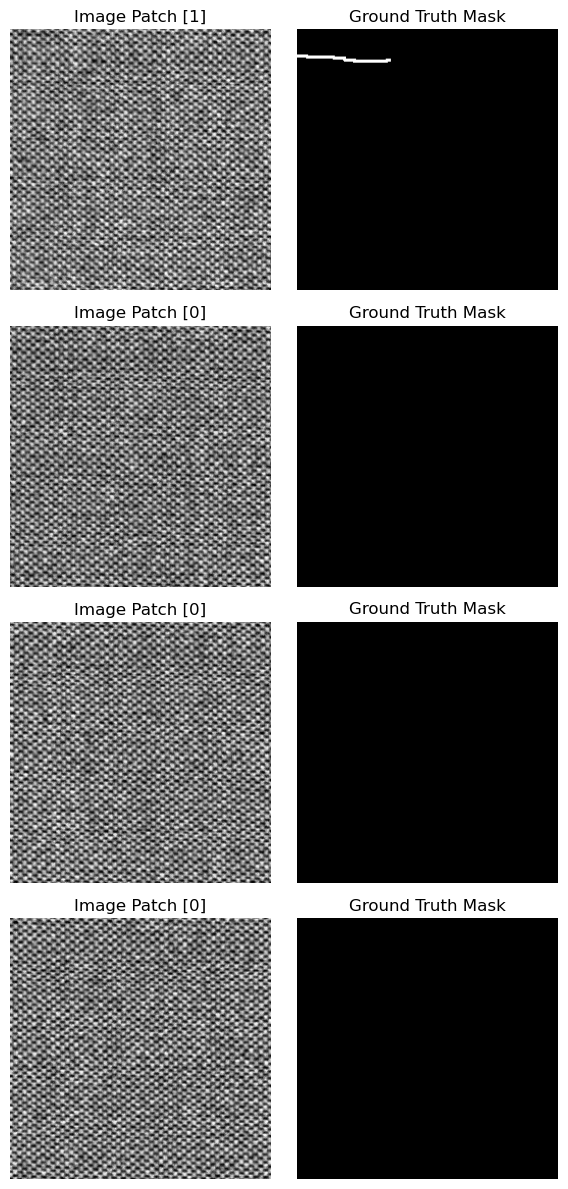

In [17]:
from codebase.data.visualization import show_test_batch

# For test mode
for images, masks, labels, _, _ in test_loader:
    show_test_batch(images, masks, labels, n=4)
    break

### Filter only defect images

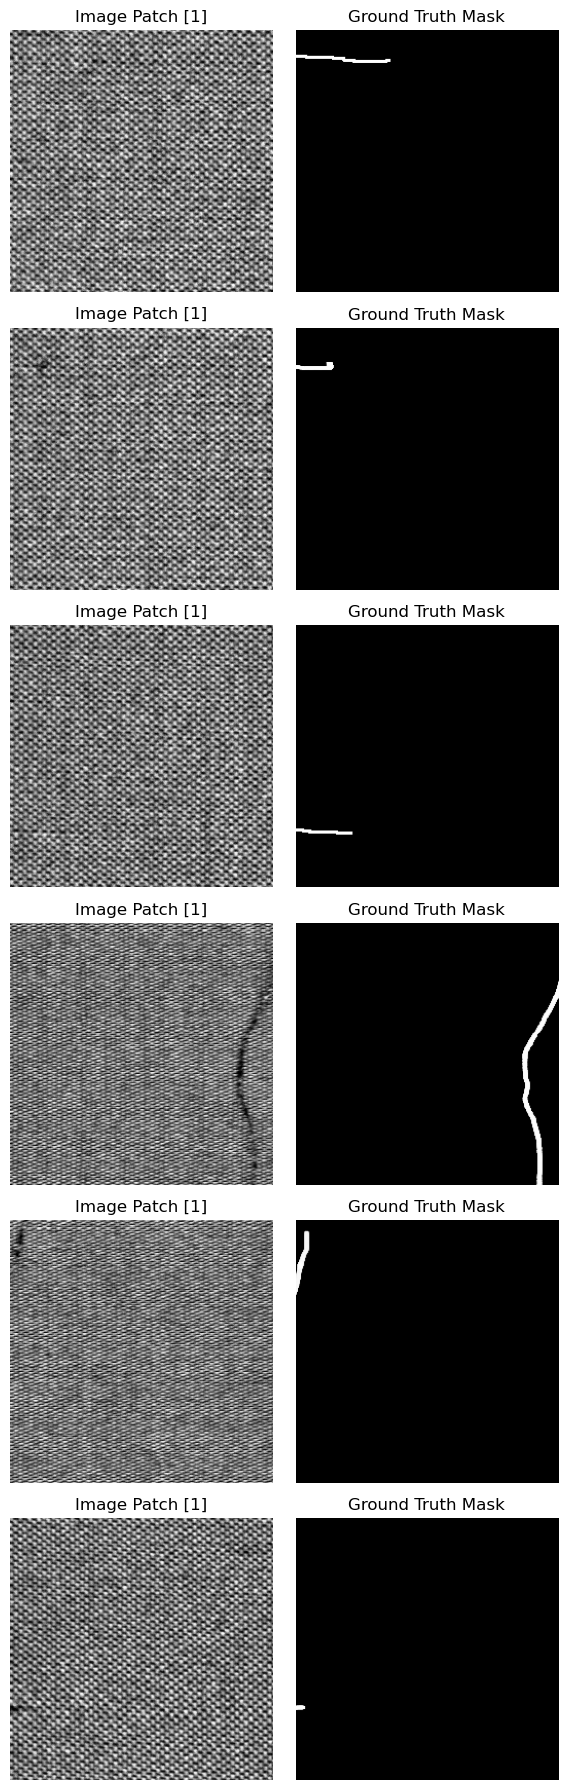

In [18]:
from codebase.data.visualization import show_test_batch
import torch

# Collect all defective samples
defect_images = []
defect_masks = []
defect_labels = []

for images, masks, labels, _, _ in test_loader:
    for img, mask, label in zip(images, masks, labels):
        if label == 1:
            defect_images.append(img)
            defect_masks.append(mask)
            defect_labels.append(label)

    # Stop after collecting enough defect samples
    if len(defect_images) >= 8:
        break

# Stack and show the first 6 defect patches
if len(defect_images) > 0:
    imgs_tensor = torch.stack(defect_images[:6])
    masks_tensor = torch.stack(defect_masks[:6])
    labels_tensor = torch.tensor(defect_labels[:6])
    show_test_batch(imgs_tensor, masks_tensor, labels_tensor, n=6)
else:
    print("No defect patches found in test set.")


## Statistical Properties and FFT Analyzation

In [19]:
import torch
import numpy as np

def analyze_loader_statistics(loader, fft_enabled=True):
    total_pixels = 0
    pixel_sum = 0.0
    pixel_squared_sum = 0.0
    pixel_min = float('inf')
    pixel_max = float('-inf')

    fft_magnitudes = []

    for batch in loader:
        images = batch[0] if isinstance(batch, (tuple, list)) else batch  # handle (x, mask, label...) case
        images = images.to(torch.float32)

        batch_min = images.min().item()
        batch_max = images.max().item()
        pixel_min = min(pixel_min, batch_min)
        pixel_max = max(pixel_max, batch_max)

        pixel_sum += images.sum().item()
        pixel_squared_sum += (images ** 2).sum().item()
        total_pixels += images.numel()

        if fft_enabled:
            # Compute FFT per image and take mean magnitude
            fft_batch = torch.fft.fft2(images)
            fft_mag = torch.abs(fft_batch).mean(dim=(1, 2, 3))  # mean per image
            fft_magnitudes.extend(fft_mag.cpu().numpy())

    mean = pixel_sum / total_pixels
    std = np.sqrt(pixel_squared_sum / total_pixels - mean ** 2)

    stats = {
        "min": pixel_min,
        "max": pixel_max,
        "mean": mean,
        "std": std
    }

    return stats, fft_magnitudes

Now let's calculate and visualize the **FFT Magnitude Distribution** of the entire training and test set:

Train Stats: {'min': 0.027450980618596077, 'max': 0.9960784316062927, 'mean': 0.4748622459571103, 'std': 0.1752926243119272}
Test Stats: {'min': 0.0235294122248888, 'max': 1.0, 'mean': 0.4812719923897442, 'std': 0.196890059656844}


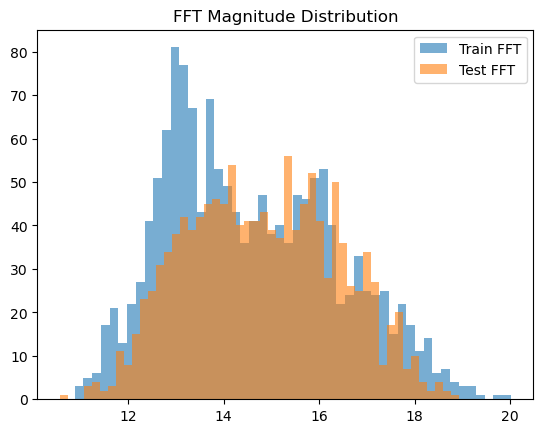

In [21]:
import matplotlib.pyplot as plt

train_stats, train_fft = analyze_loader_statistics(train_loader)
test_stats, test_fft = analyze_loader_statistics(test_loader)

print("Train Stats:", train_stats)
print("Test Stats:", test_stats)

# Optional: visualize FFT

plt.hist(train_fft, bins=50, alpha=0.6, label="Train FFT")
plt.hist(test_fft, bins=50, alpha=0.6, label="Test FFT")
plt.title("FFT Magnitude Distribution")
plt.legend()
plt.show()

### FFT Magnitude Distributions for each individual Fabric Code
Ok, this is somewhat useful but let us analyze the **FFT Magnitude Distributions* for each individual *Fabric Code*:

Analyzing fabric 00000...
Using FFT transform: False
Using histogram equalization: False
Using image size: None
Using channel repeating: False
Using normalization: zero-one
Using augmentations: False
Using FFT transform: False
Using histogram equalization: False
Using image size: None
Using channel repeating: False
Using normalization: zero-one
Using augmentations: False
Analyzing fabric 00001...
Using FFT transform: False
Using histogram equalization: False
Using image size: None
Using channel repeating: False
Using normalization: zero-one
Using augmentations: False
Using FFT transform: False
Using histogram equalization: False
Using image size: None
Using channel repeating: False
Using normalization: zero-one
Using augmentations: False
Analyzing fabric 00002...
Using FFT transform: False
Using histogram equalization: False
Using image size: None
Using channel repeating: False
Using normalization: zero-one
Using augmentations: False
Using FFT transform: False
Using histogram equalizat

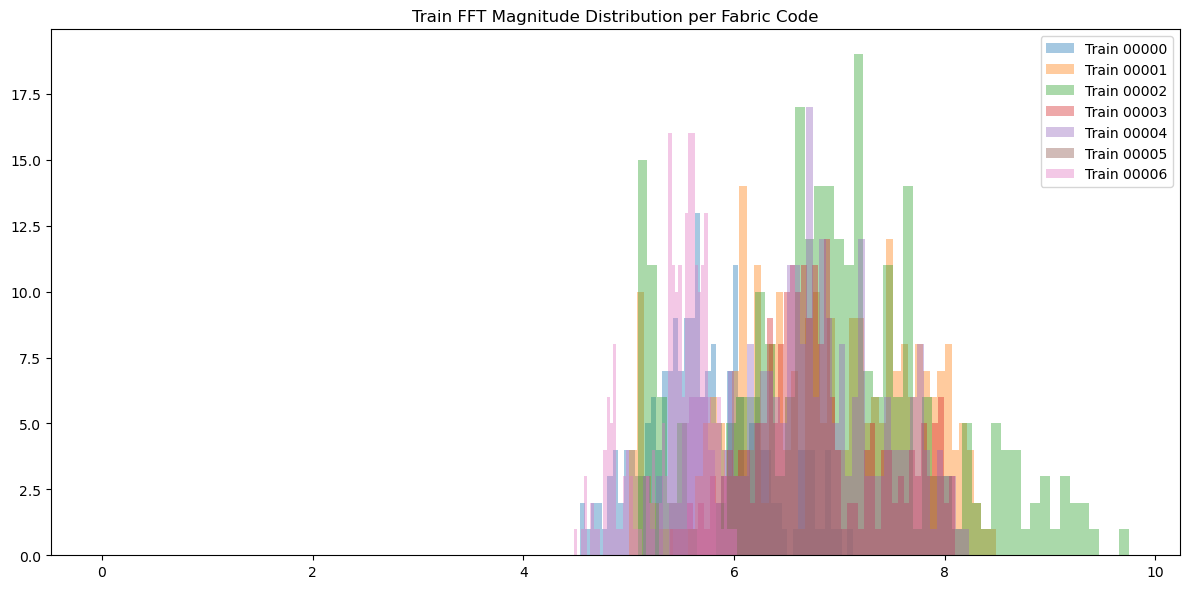

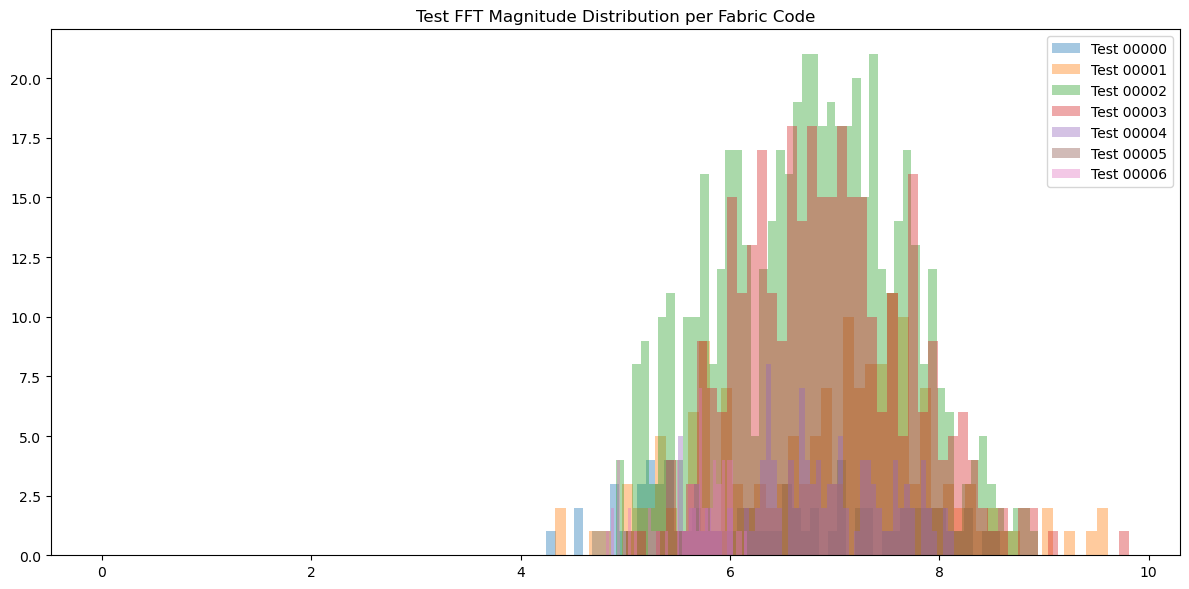

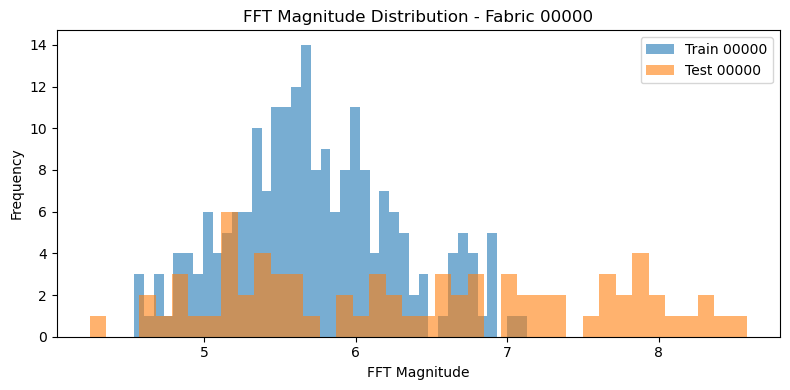

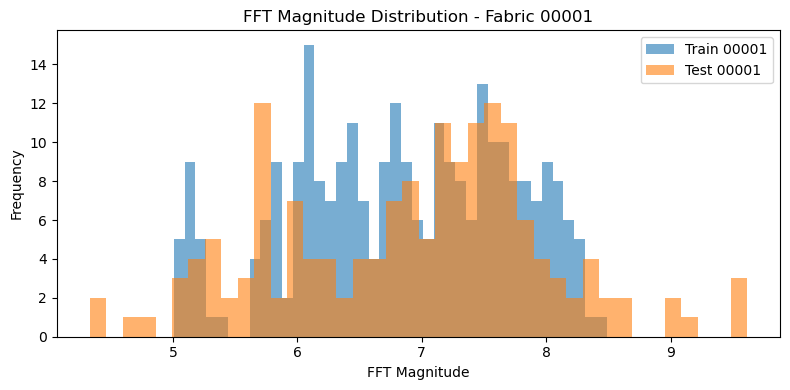

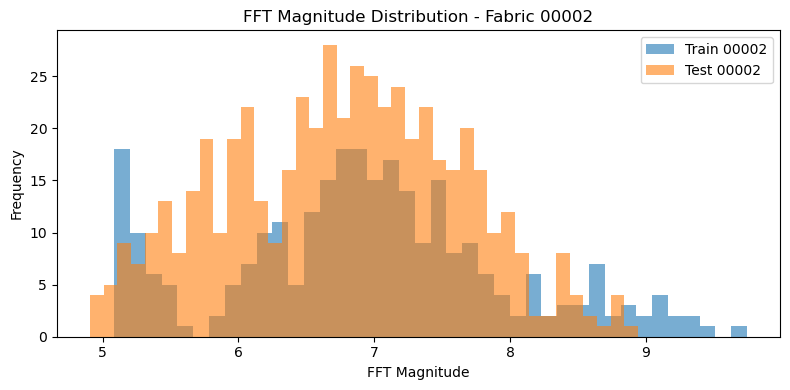

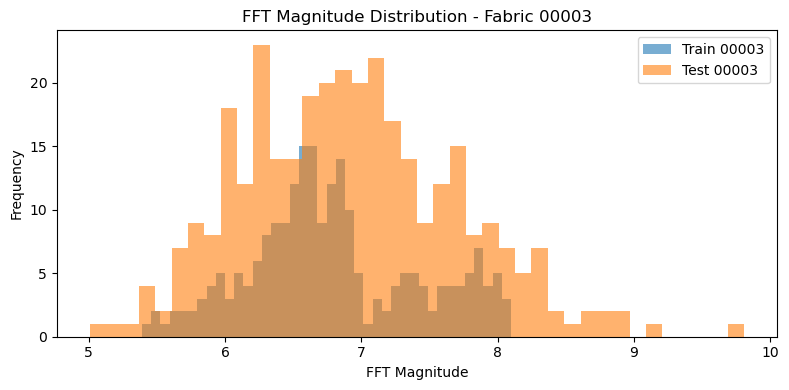

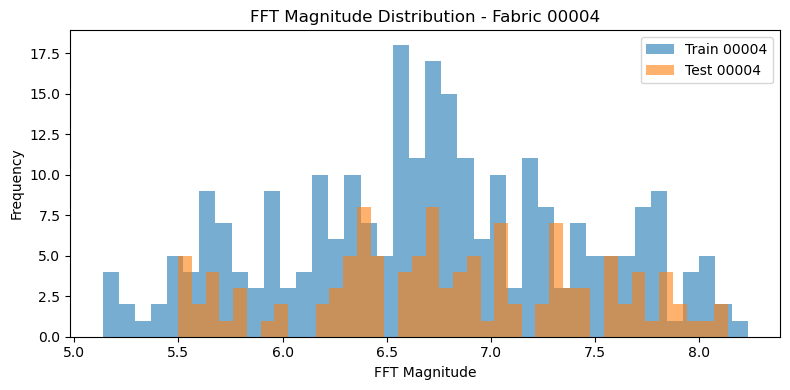

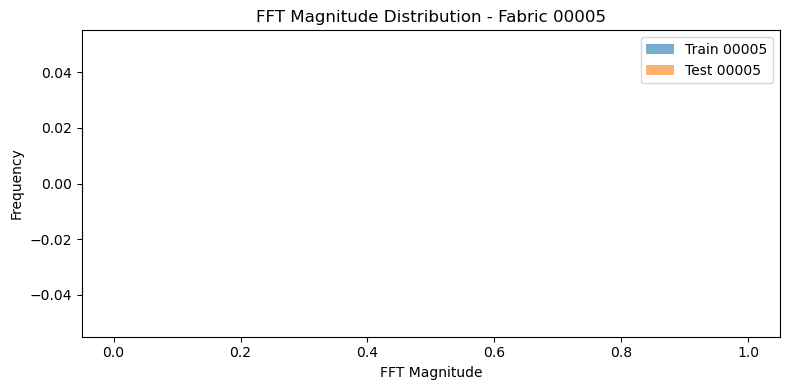

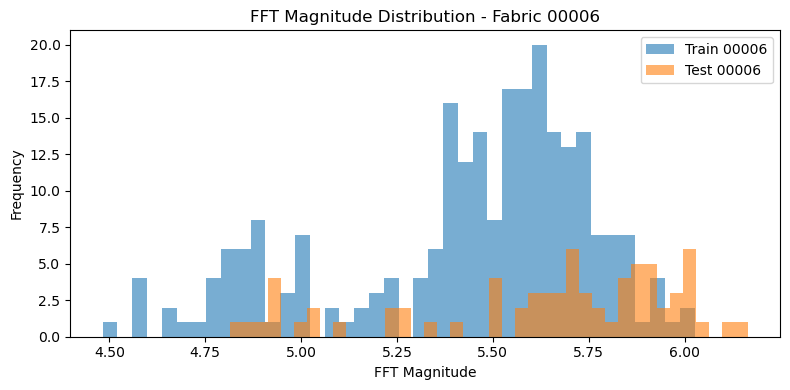

In [22]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Assuming FabricPatchDataset is already defined in scope
fabric_codes = [f"{i:05d}" for i in range(7)]

# Storage for per-fabric FFTs
per_fabric_fft = {
    "train": {},
    "test": {}
}

def analyze_loader_fft(loader):
    fft_values = []
    for batch in loader:
        x = batch[0] if isinstance(batch, (tuple, list)) else batch
        fft = torch.fft.fft2(x)
        mag = torch.abs(fft).mean(dim=(1, 2, 3))
        fft_values.extend(mag.cpu().numpy())
    return fft_values

for code in fabric_codes:
    print(f"Analyzing fabric {code}...")

    train_dataset = FabricPatchDataset(
        image_dir="./artifacts/analyzation/NODefect",
        mode="train",
        normalize="zero-one",
        augment=False,
        fabric_code=code,
        use_histogram_equalization=False,  # or True, depending on what you want to test
    )
    test_dataset = FabricPatchDataset(
        image_dir="./artifacts/analyzation/Defect",
        mask_dir="./artifacts/analyzation/Mask",
        mode="test",
        normalize="zero-one",
        augment=False,
        fabric_code=code,
        use_histogram_equalization=False
    )

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    per_fabric_fft["train"][code] = analyze_loader_fft(train_loader)
    per_fabric_fft["test"][code] = analyze_loader_fft(test_loader)

# -------------------------------
# 📊 Plot per-fabric FFT comparison
# -------------------------------
plt.figure(figsize=(12, 6))
for code in fabric_codes:
    plt.hist(per_fabric_fft["train"][code], bins=50, alpha=0.4, label=f"Train {code}")
plt.title("Train FFT Magnitude Distribution per Fabric Code")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for code in fabric_codes:
    plt.hist(per_fabric_fft["test"][code], bins=50, alpha=0.4, label=f"Test {code}")
plt.title("Test FFT Magnitude Distribution per Fabric Code")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 3️⃣ One Plot per Fabric: Train vs Test
# -------------------------------
for code in fabric_codes:
    plt.figure(figsize=(8, 4))
    plt.hist(per_fabric_fft["train"][code], bins=40, alpha=0.6, label=f"Train {code}")
    plt.hist(per_fabric_fft["test"][code], bins=40, alpha=0.6, label=f"Test {code}")
    plt.title(f"FFT Magnitude Distribution - Fabric {code}")
    plt.xlabel("FFT Magnitude")
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()


## Summary and Results

Ok, let's summarize the stats and give us the **information** that is in the end **useful** for us to optimize the dataset:

In [ ]:
def summarize_fft_stats(per_fabric_fft, threshold=0.5):
    """
    Print FFT mean/std per fabric code for train/test and flag differences.
    
    Args:
        per_fabric_fft (dict): Dict containing "train" and "test" keys,
                               each with fabric_code -> list of FFT magnitudes.
        threshold (float): Max acceptable difference in mean between train and test.
    """
    print(f"{'Fabric':<10} | {'Train Mean':<10} | {'Test Mean':<10} | {'Δ Mean':<8} | Status")
    print("-" * 60)

    for code in sorted(per_fabric_fft['train'].keys()):
        train_vals = per_fabric_fft['train'].get(code, [])
        test_vals = per_fabric_fft['test'].get(code, [])

        if len(train_vals) == 0:
            print(f"{code:<10} | {'N/A':<10} | {'?':<10} | {'?':<8} | ⚠️ No train data")
            continue
        if len(test_vals) == 0:
            print(f"{code:<10} | {'✓':<10} | {'N/A':<10} | {'?':<8} | ⚠️ No test data")
            continue

        train_mean = np.mean(train_vals)
        test_mean = np.mean(test_vals)
        diff = abs(train_mean - test_mean)

        status = "✅ OK" if diff <= threshold else "❌ Mismatch"

        print(f"{code:<10} | {train_mean:<10.3f} | {test_mean:<10.3f} | {diff:<8.3f} | {status}")

    print("\nTip: Consider fabric-wise thresholds or separate models for ❌ entries.")

summarize_fft_stats(per_fabric_fft, threshold=0.5) # assuming a threshold of 0.5 for mean difference

Fabric     | Train Mean | Test Mean  | Δ Mean   | Status
------------------------------------------------------------
00000      | 5.728      | 6.409      | 0.681    | ❌ Mismatch
00001      | 6.846      | 6.921      | 0.075    | ✅ OK
00002      | 6.943      | 6.762      | 0.181    | ✅ OK
00003      | 6.790      | 6.917      | 0.127    | ✅ OK
00004      | 6.703      | 6.803      | 0.100    | ✅ OK
00005      | N/A        | ?          | ?        | ⚠️ No train data
00006      | 5.435      | 5.631      | 0.196    | ✅ OK

Tip: Consider fabric-wise thresholds or separate models for ❌ entries.


## 🔚 Conclusion & Key Adjustments

This analysis led to important findings about the internal structure of the AITEX dataset:

---

### ✅ Key Takeaways

- The FFT analysis revealed subtle **texture variations between train and test samples**, especially for certain fabric codes.
- Through detailed inspection, we identified that **fabric code `00005` was present in the test set but completely missing from the training set**.
- Keeping this fabric in the test split would result in unfair evaluation, as the model would be tested on a texture it had **never seen before**.

---

### 🧼 Dataset Optimization

- To correct this inconsistency, we **removed fabric code `00005`** from the dataset.
- This step ensures that **all fabric types in the test set are represented in the training set**, allowing for a more valid and interpretable evaluation of anomaly detection performance.

---

### 🔜 What's Next?

- Proceed with **model training** using the cleaned and texture-consistent dataset.
- Monitor performance across fabric types to ensure generalization.
- Optionally: Extend FFT analysis to generated synthetic patches to compare their frequency profiles with real data.

---

By resolving subtle structural imbalances in the dataset, we strengthen the foundation for training reliable and domain-consistent anomaly detection models.

<p style="font-size: 0.8em; text-align: center;">© 2025 Oliver Grau. Educational content for personal use only. See LICENSE.txt for full terms and conditions.</p>